In [35]:
%reset

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib.ticker import MultipleLocator

In [37]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)


In [40]:
#get paths for data files
path_swe_metrics = ROOT_DIR + '/Data/Raw/snow_metrics1.csv'
path_peak_flow_200 = ROOT_DIR + '/Data/Raw/peaks_200.csv'
#path_peak_flow_200 = ROOT_DIR + '/Data/Raw/peaks_200.csv'

In [42]:
swe_metrics = pd.read_csv(path_swe_metrics)
peak_flow_200 = pd.read_csv(path_peak_flow_200)
n_peaks_200  = peak_flow_200[((peak_flow_200["year"] >= 1997) & (peak_flow_200['year'] <= 2018))]
swe_metrics['no_peaks_200'] = n_peaks_200.no_peaks.values
#peak_flow_200


In [43]:
swe_metrics

,ENSO,year,maxswe,max_swe_date,SWE_at_SP_melt,SP_melt_start_date,SP_melt_end_date,melt rate,melt duration,n_mwme,...,max_SWE_date,mindate_meanwtemp,minval_meanwtemp,maxdate_meanwtemp,maxval_meanwtemp,TDJF,TMAM,PMAM,PDJF,no_peaks_200
0,normal,1997,46.8,14-Apr,41.9,2-May,1-Jun,1.56,30,2,...,4/14/97 0:00,12/26/96 0:00,0.1,8/14/97 0:00,14.1,-0.713546,3.279710,1292.86,1785.62,4
1,warm,1998,27.4,11-Mar,23.6,15-Apr,5-May,1.37,20,3,...,3/11/98 0:00,1/11/98 0:00,-0.2,7/28/98 0:00,16.0,0.180864,4.084691,668.02,1155.70,3
2,cold,1999,53.2,10-Apr,46.0,6-May,17-Jun,1.27,42,2,...,4/10/99 0:00,12/20/98 0:00,0.0,8/5/99 0:00,12.6,-1.389568,2.626630,774.70,1993.90,2
3,cold,2000,42.0,31-Mar,42.0,31-Mar,28-May,0.72,58,1,...,3/29/00 0:00,1/30/00 0:00,0.7,8/5/00 0:00,14.1,0.055800,3.503623,848.36,1592.58,2
4,cold,2001,21.3,14-Apr,21.3,14-Apr,19-May,0.61,35,5,...,4/14/01 0:00,2/16/01 0:00,0.1,8/13/01 0:00,14.1,0.117284,3.833273,944.88,787.40,1
5,normal,2002,59.4,30-Mar,50.9,9-May,18-Jun,1.49,40,5,...,3/30/02 0:00,3/20/02 0:00,0.1,8/29/02 0:00,12.9,-0.849136,2.203684,1285.24,1673.86,4
6,warm,2003,15.6,31-Dec,11.0,8-Apr,13-May,0.45,35,6,...,4/8/03 0:00,3/7/03 0:00,1.1,7/31/03 0:00,15.8,1.274444,3.382022,960.12,1117.60,3
7,normal,2004,36.0,7-Mar,30.7,3-Apr,3-May,1.20,30,5,...,3/7/04 0:00,1/5/04 0:00,0.1,7/24/04 0:00,15.7,0.282593,5.195411,774.70,1315.72,3
8,normal,2005,8.1,13-Dec,5.6,18-Apr,27-Apr,0.90,9,7,...,4/16/05 0:00,1/15/05 0:00,0.0,8/15/05 0:00,14.2,2.800370,6.209239,695.96,1056.64,3
9,normal,2006,40.5,18-Apr,40.5,18-Apr,21-May,1.23,33,3,...,4/18/06 0:00,2/17/06 0:00,0.0,7/23/06 0:00,15.1,1.395391,5.176751,774.70,1539.24,2


In [44]:
swe_metrics.set_index('year')
swe_metrics['SWE_at_SP_melt_mm'] = swe_metrics['SWE_at_SP_melt']*25.4
swe_metrics['maxswe_mm'] = swe_metrics['maxswe']*25.4
swe_metrics['melt_rate_mm'] = swe_metrics['SWE_at_SP_melt_mm'] / swe_metrics['melt duration']
swe_metrics

,ENSO,year,maxswe,max_swe_date,SWE_at_SP_melt,SP_melt_start_date,SP_melt_end_date,melt rate,melt duration,n_mwme,...,maxdate_meanwtemp,maxval_meanwtemp,TDJF,TMAM,PMAM,PDJF,no_peaks_200,SWE_at_SP_melt_mm,maxswe_mm,melt_rate_mm
0,normal,1997,46.8,14-Apr,41.9,2-May,1-Jun,1.56,30,2,...,8/14/97 0:00,14.1,-0.713546,3.279710,1292.86,1785.62,4,1064.26,1188.72,35.475333
1,warm,1998,27.4,11-Mar,23.6,15-Apr,5-May,1.37,20,3,...,7/28/98 0:00,16.0,0.180864,4.084691,668.02,1155.70,3,599.44,695.96,29.972000
2,cold,1999,53.2,10-Apr,46.0,6-May,17-Jun,1.27,42,2,...,8/5/99 0:00,12.6,-1.389568,2.626630,774.70,1993.90,2,1168.40,1351.28,27.819048
3,cold,2000,42.0,31-Mar,42.0,31-Mar,28-May,0.72,58,1,...,8/5/00 0:00,14.1,0.055800,3.503623,848.36,1592.58,2,1066.80,1066.80,18.393103
4,cold,2001,21.3,14-Apr,21.3,14-Apr,19-May,0.61,35,5,...,8/13/01 0:00,14.1,0.117284,3.833273,944.88,787.40,1,541.02,541.02,15.457714
5,normal,2002,59.4,30-Mar,50.9,9-May,18-Jun,1.49,40,5,...,8/29/02 0:00,12.9,-0.849136,2.203684,1285.24,1673.86,4,1292.86,1508.76,32.321500
6,warm,2003,15.6,31-Dec,11.0,8-Apr,13-May,0.45,35,6,...,7/31/03 0:00,15.8,1.274444,3.382022,960.12,1117.60,3,279.40,396.24,7.982857
7,normal,2004,36.0,7-Mar,30.7,3-Apr,3-May,1.20,30,5,...,7/24/04 0:00,15.7,0.282593,5.195411,774.70,1315.72,3,779.78,914.40,25.992667
8,normal,2005,8.1,13-Dec,5.6,18-Apr,27-Apr,0.90,9,7,...,8/15/05 0:00,14.2,2.800370,6.209239,695.96,1056.64,3,142.24,205.74,15.804444
9,normal,2006,40.5,18-Apr,40.5,18-Apr,21-May,1.23,33,3,...,7/23/06 0:00,15.1,1.395391,5.176751,774.70,1539.24,2,1028.70,1028.70,31.172727


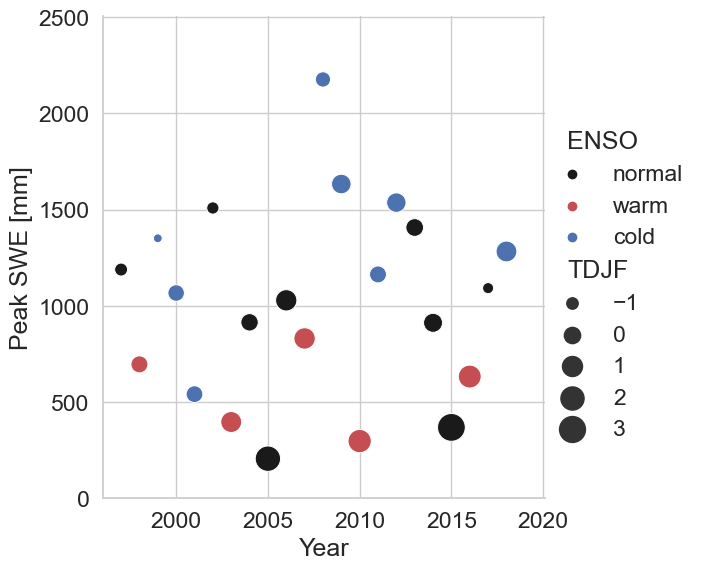

In [46]:
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
gfg = sns.relplot(x="year", y="maxswe_mm", hue="ENSO", size="TDJF",
            sizes=(40, 400), alpha=1, palette = ["k", "r", "b"],
            height=6, data=swe_metrics)

gfg.set(ylim=(0, 2506))
gfg.set(xlim=(1996, 2020.1))
gfg.set_xlabels('Year')
gfg.set_ylabels('Peak SWE [mm]')
# replace legend labels

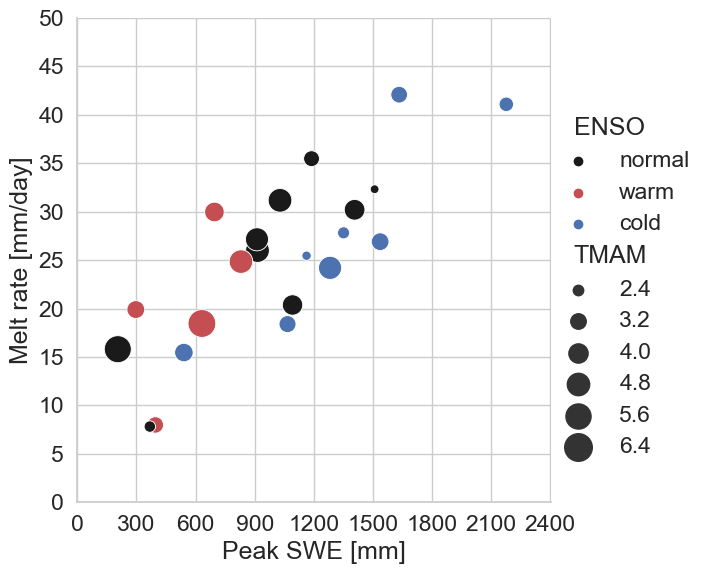

In [48]:
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

gfg = sns.relplot(x="maxswe_mm", y="melt_rate_mm", hue="ENSO", size="TMAM",
            sizes=(40, 400), alpha=1, palette = ["k", "r", "b"],
            height=6, data=swe_metrics)
gfg.set(ylim=(0, 50))
gfg.set(xlim=(0, 2406))
gfg.set_xlabels('Peak SWE [mm]')
gfg.set_ylabels('Melt rate [mm/day]')
# replace legend labels

gfg.axes[0][0].xaxis.set_major_locator(MultipleLocator(300))
gfg.axes[0][0].yaxis.set_major_locator(MultipleLocator(5))

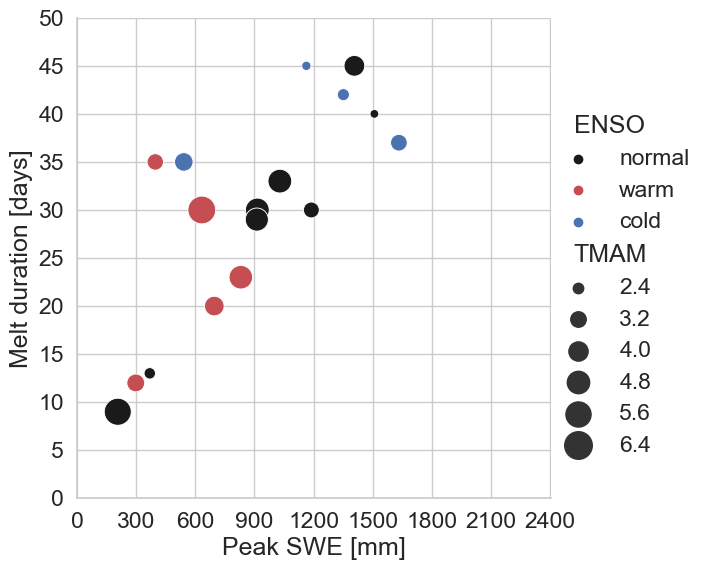

In [49]:
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
gfg = sns.relplot(x="maxswe_mm", y="melt duration", hue="ENSO", size="TMAM",
            sizes=(40, 400), alpha=1, palette = ["k", "r", "b"],
            height=6, data=swe_metrics)

gfg.set(ylim=(0, 50))
gfg.set(xlim=(0, 2408))
gfg.set_xlabels('Peak SWE [mm]')
gfg.set_ylabels('Melt duration [days]')

gfg.axes[0][0].xaxis.set_major_locator(MultipleLocator(300))
gfg.axes[0][0].yaxis.set_major_locator(MultipleLocator(5))

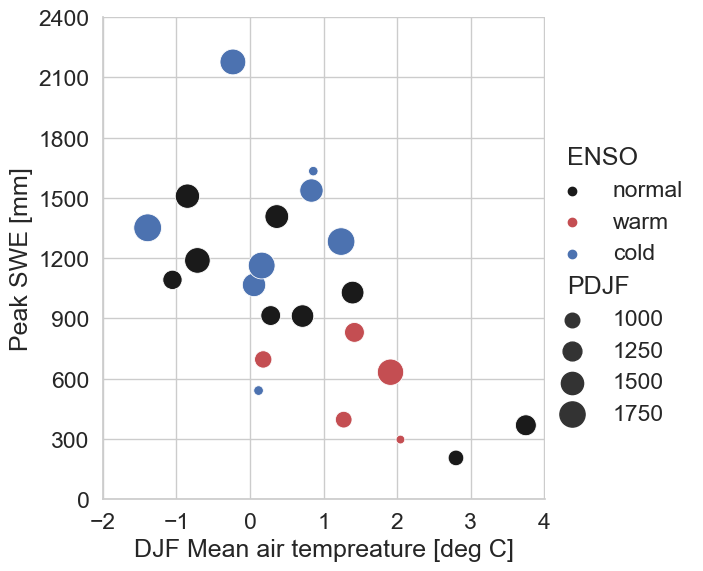

In [50]:
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


gfg = sns.relplot(x="TDJF", y="maxswe_mm", hue="ENSO", size="PDJF",
            sizes=(40, 400), alpha=1, palette = ["k", "r", "b"],
            height=6, data=swe_metrics)

gfg.set(xlim=(-2, 4.01))
gfg.set(ylim=(0, 2400))
gfg.set_ylabels('Peak SWE [mm]')
gfg.set_xlabels('DJF Mean air tempreature [deg C]')


gfg.axes[0][0].yaxis.set_major_locator(MultipleLocator(300))
gfg.axes[0][0].xaxis.set_major_locator(MultipleLocator(1))

In [99]:
#sns.set(font_scale=2)
#sns.relplot(x="precip_total", y="maxswe_mm", hue="ENSO", size="maxswe_mm",
#            sizes=(40, 400), alpha=.5, palette="muted",
#            height=6, data=swe_metrics)

In [100]:
#sns.set(font_scale=2)
#sns.relplot(x="min_discharge", y="maxswe_mm", hue="ENSO", size="precip_total",
#            sizes=(40, 400), alpha=.5, palette="muted",
#            height=6, data=swe_metrics)

In [103]:
#sns.set(font_scale=2)
#sns.relplot(x="precip_total", y="max_discharge", hue="ENSO", size="maxswe_mm",
#            sizes=(40, 400), alpha=.5, palette="muted",
#            height=6, data=swe_metrics)

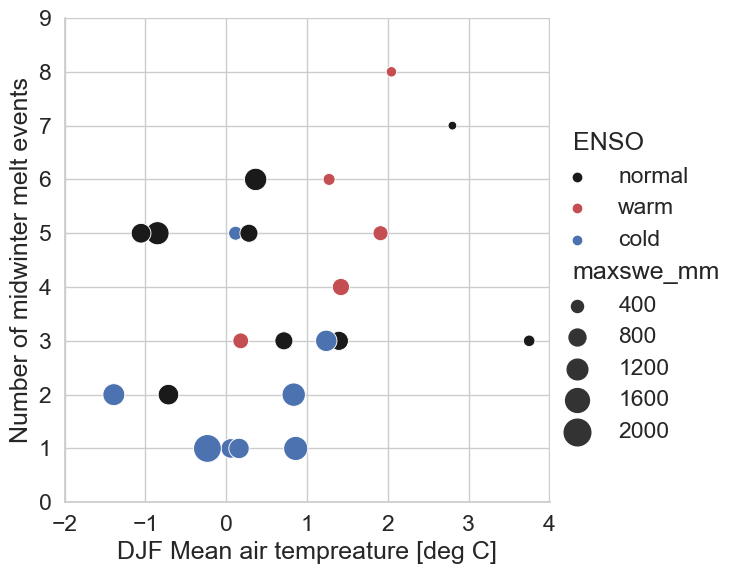

In [51]:
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


gfg = sns.relplot(x="TDJF", y="n_mwme", hue="ENSO", size="maxswe_mm",
            sizes=(40, 400), alpha=1, palette = ["k", "r", "b"],
            height=6, data=swe_metrics)

gfg.set(xlim=(-2, 4.01))
gfg.set(ylim=(0, 9))
gfg.set_ylabels('Number of midwinter melt events')
gfg.set_xlabels('DJF Mean air tempreature [deg C]')
sns.set_palette('bright')

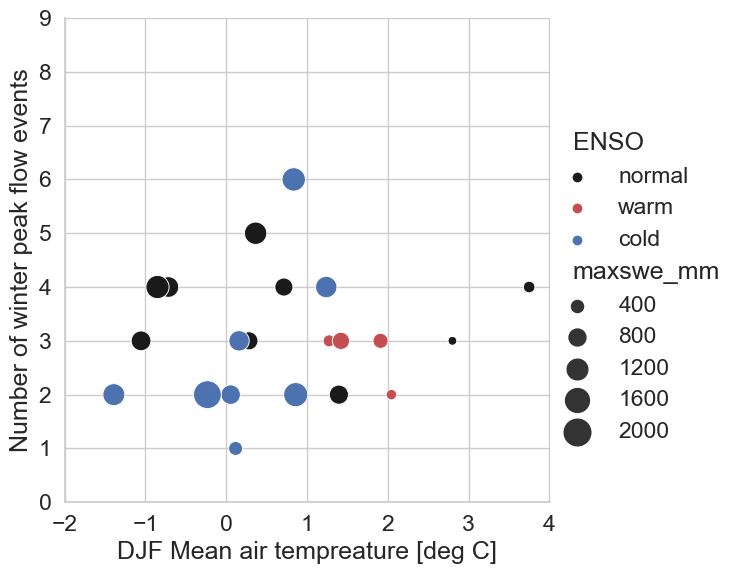

In [52]:
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

gfg = sns.relplot(x="TDJF", y="no_peaks_200", hue="ENSO", size="maxswe_mm",
            sizes=(40, 400), alpha=1, palette = ["k", "r", "b"],
            height=6, data=swe_metrics)

gfg.set(xlim=(-2, 4.01))
gfg.set(ylim=(0, 9))
gfg.set_ylabels('Number of winter peak flow events')
gfg.set_xlabels('DJF Mean air tempreature [deg C]')
sns.set_palette('bright')